In [152]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [190]:
def match_data_to_label(features, matched):
    columns_names=list(features.columns) + list(matched.columns) if "label" not in features.index else list(features.columns)
    df = pd.DataFrame(np.zeros([matched.shape[0], len(columns_names)]), columns=columns_names, index=labels.index)
    for _id, seq in df.iterrows():
        found = True
        for item in columns_names[:-1]:
            if(_id in features.index):
                seq[item] = features.at[_id, item]
            else:
                found = False
                continue
        if(found):
            seq["label"] = matched.at[_id,"label"]
    return df


def match_data_by_id(features, new):
    columns_names=list(features.columns)
    df = pd.DataFrame(np.zeros([new.shape[0], len(columns_names)]), columns=columns_names, index=new.index)
    for _id, seq in df.iterrows():
        found = True
        for item in columns_names:
            seq[item] = features.at[_id, item]
    return df

In [212]:
raw_data = pd.read_csv("training_data/features_no_dupes.csv", index_col=["id"])
labels = pd.read_csv("sequence_labels_1.csv", index_col="id")
data = match_data_to_label(raw_data, labels)
features = data.columns.values[:-1]
data.head()


,avg_speed,min_speed,max_speed,max_accel,max_deaccel,mean_dist_med_speed,sd_speed,percent_ped_speed,percent_bic_speed,percent_car_speed,num_stops,distance,msd,sinuosity,turosity,convex_hull_area,mean_relative_angle,duration,label
id,,,,,,,,,,,,,,,,,,,
6lmxhlsdu2820pp9ewk41z,16.092218,0.232964,25.961550,10.652202,-13.501058,12.864293,5.964283,0.697674,7.209302,86.511628,0.0,7917.451715,3.121126e-08,1.037741,0.004473,0.155636,0.054281,492.005,2.0
g234mtreigui4a64i4xea9,6.322339,0.141193,12.872192,3.198201,-6.585177,6.365499,2.824493,0.735294,26.470588,36.764706,2.0,1132.324604,4.941278e-09,1.007190,0.012726,0.021988,0.142937,179.099,2.0
hwt93drmgmyk3pnt7hib08,1.275309,0.620147,2.196088,1.129826,-7.976933,0.787971,0.274747,67.193676,0.000000,0.000000,0.0,366.273853,1.103109e-10,2.232828,0.009084,0.006280,-0.585815,287.204,0.0
9gmnn1cdfv7vbptl9p83u2,1.210824,0.079203,2.395365,1.275051,-4.657094,1.158081,0.336322,60.103627,0.000000,0.000000,4.0,562.095759,1.374220e-10,1.304693,0.006812,0.013878,0.552962,464.226,0.0
18ejk5cjxixj051qiupxyb,1.313297,0.637032,2.017232,1.256552,-2.369025,0.690100,0.291555,57.831325,0.000000,0.000000,0.0,126.595226,1.912423e-10,1.040797,0.024806,0.003729,0.468846,96.395,0.0


0.0    550
1.0    258
2.0    154
Name: label, dtype: int64

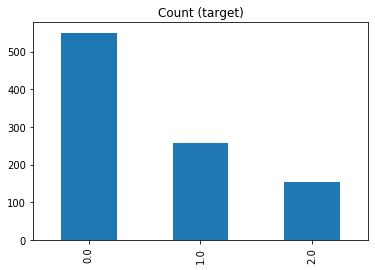

In [202]:
data.label.value_counts().plot(kind='bar', title='Count (target)')
data.label.value_counts()

1.0    550
0.0    550
2.0    550
Name: label, dtype: int64

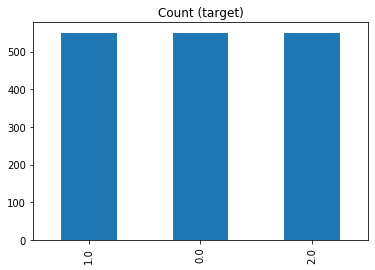

In [232]:
# Try SMOTE
smote = SMOTE()
x_sm, y_sm = smote.fit_sample(data[features],data.label)
x_sm["label"] = y_sm
sm_data = x_sm
y_sm.value_counts().plot(kind='bar', title='Count (target)')
y_sm.value_counts()

In [233]:
selected_data = sm_data
x = StandardScaler().fit_transform(selected_data[features])
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pdf = pd.DataFrame(data = principalComponents
             , columns = ['pca1', 'pca2'], index=selected_data.index)
pdf["label"] = selected_data[['label']].values

# 95% confidance test, using z_scores
z_scores = pdf.groupby('label')['pca1','pca2'].apply(lambda x: (x - x.mean())/x.std())
pca1_t = 2
pca2_t = 2
pdf_z = pdf[abs(z_scores["pca1"]) < pca1_t]
pdf_z = pdf_z[abs(z_scores["pca2"]) < pca2_t]
finalDf = pdf_z
finalDf

/mnt/c/Users/krist/Documents/mapillary/venv/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,pca1,pca2,label
0,2.843040,-0.487600,2.0
1,-0.097319,0.370786,2.0
2,-2.076814,-0.244541,0.0
3,-1.992539,-0.397793,0.0
4,-2.143337,-0.191474,0.0
...,...,...,...
1644,0.170041,0.233815,2.0
1645,0.226993,0.403876,2.0
1646,-1.975754,0.477847,2.0
1647,0.871145,-0.550581,2.0


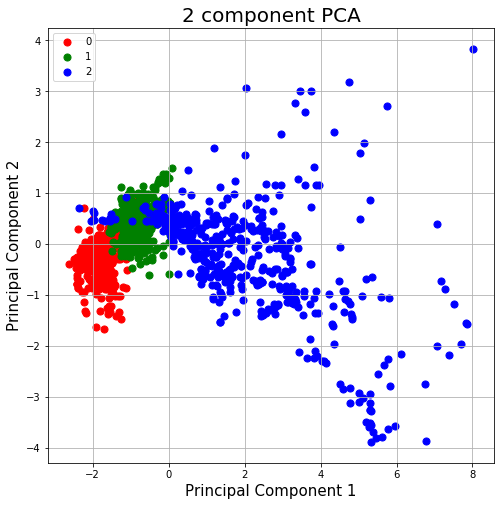

In [234]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pca1']
               , finalDf.loc[indicesToKeep, 'pca2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [235]:
selected_data = match_data_by_id(selected_data, finalDf)

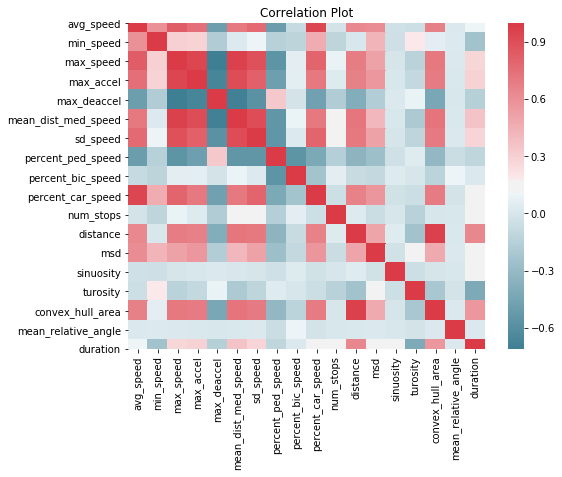

In [236]:
pearson = selected_data[features].corr(method="pearson")
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(pearson, mask=np.zeros_like(pearson, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), ax=ax)
plt.show()

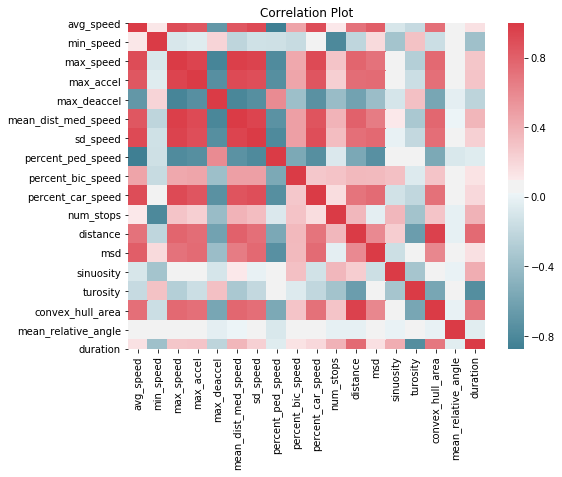

In [237]:
spearman = selected_data[features].corr(method="spearman")
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(spearman, mask=np.zeros_like(spearman, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), ax=ax)
plt.show()


In [238]:
def write_pd_to_file(type_, d):
    df = d
    df["id"]=d.index
    display(d)
    d.to_csv(f"training_data/filtered_features_{type_}.csv", index=None)
write_pd_to_file("smote", selected_data)

,avg_speed,min_speed,max_speed,max_accel,max_deaccel,mean_dist_med_speed,sd_speed,percent_ped_speed,percent_bic_speed,percent_car_speed,num_stops,distance,msd,sinuosity,turosity,convex_hull_area,mean_relative_angle,duration,label,id
0,16.092218,0.232964,25.961550,10.652202,-13.501058,12.864293,5.964283,0.697674,7.209302,86.511628,0.000000,7917.451715,3.121126e-08,1.037741,0.004473,0.155636,0.054281,492.005000,2.0,0
1,6.322339,0.141193,12.872192,3.198201,-6.585177,6.365499,2.824493,0.735294,26.470588,36.764706,2.000000,1132.324604,4.941278e-09,1.007190,0.012726,0.021988,0.142937,179.099000,2.0,1
2,1.275309,0.620147,2.196088,1.129826,-7.976933,0.787971,0.274747,67.193676,0.000000,0.000000,0.000000,366.273853,1.103109e-10,2.232828,0.009084,0.006280,-0.585815,287.204000,0.0,2
3,1.210824,0.079203,2.395365,1.275051,-4.657094,1.158081,0.336322,60.103627,0.000000,0.000000,4.000000,562.095759,1.374220e-10,1.304693,0.006812,0.013878,0.552962,464.226000,0.0,3
4,1.313297,0.637032,2.017232,1.256552,-2.369025,0.690100,0.291555,57.831325,0.000000,0.000000,0.000000,126.595226,1.912423e-10,1.040797,0.024806,0.003729,0.468846,96.395000,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,8.813280,1.661881,11.704784,4.433360,-7.044929,5.021452,2.374685,0.000000,16.228293,58.602776,0.000000,340.826427,1.654096e-08,1.002571,0.054967,0.006911,-0.097792,39.065933,2.0,1644
1645,5.169020,0.000000,14.473157,12.201261,-6.277391,7.236578,3.926865,3.046691,35.300724,23.034769,7.781064,1604.043863,3.317929e-08,1.052615,0.084944,0.061575,0.591315,316.425997,2.0,1645
1646,1.854119,0.741191,4.855646,1.777065,-1.275196,2.057227,1.495231,41.392289,22.167719,0.000000,0.549388,32.537817,2.535268e-10,1.001443,0.270793,0.001278,-0.235057,17.623791,2.0,1646
1647,5.695889,0.044838,16.038118,13.773378,-1.614134,7.996640,3.962626,1.299457,32.500456,24.829241,14.261536,4825.791117,6.222567e-08,1.464533,0.014413,0.105271,-0.320489,876.486478,2.0,1647
